<a href="https://colab.research.google.com/github/keyurshah710/Python-graphing-and-statistical-Analysis./blob/main/statistical_analysis_and_advanced_graphing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
from sklearn.metrics import r2_score

In [ ]:
#Assignment #3 Instructions
#Step 1: Load and examine data (new skill – eliminating outliers)
#Read the cars data from the cars.csv file (attached)

df=pd.read_csv('/content/drive/MyDrive/Independent Study/cars.csv')
df.head()


,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [ ]:
#Split the data into testing and training data sets.
X = df.drop('price', axis=1)
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
#Check the correlations that the numeric variables in the training data set have with the price variable.
train_data = pd.concat([X_train, y_train], axis=1)
numeric_vars = train_data.select_dtypes(include='number')
correlations = numeric_vars.corr()['price'].abs().sort_values(ascending=False)
correlations.head()



price         1.000000
enginesize    0.866433
curbweight    0.824212
horsepower    0.810986
carwidth      0.744310
Name: price, dtype: float64

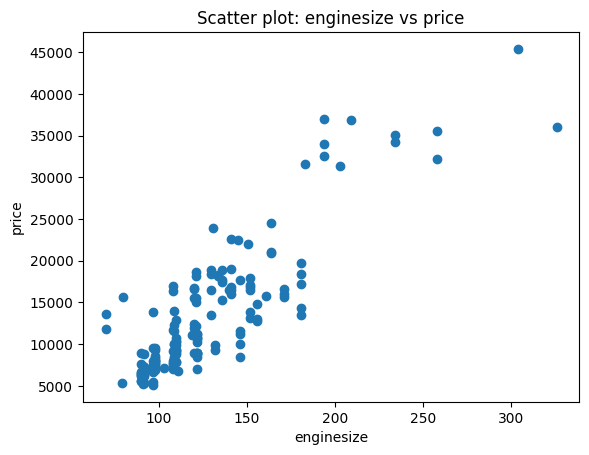

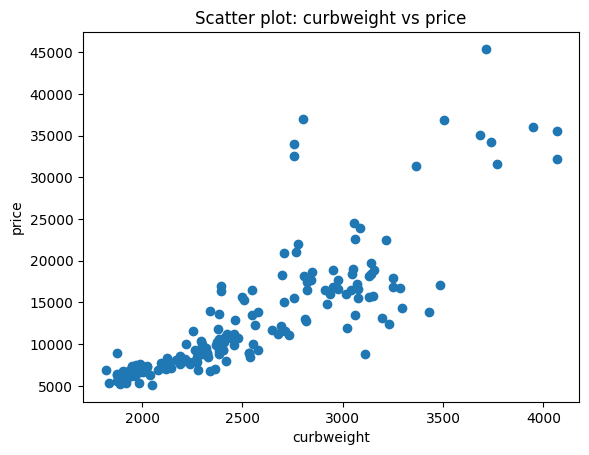

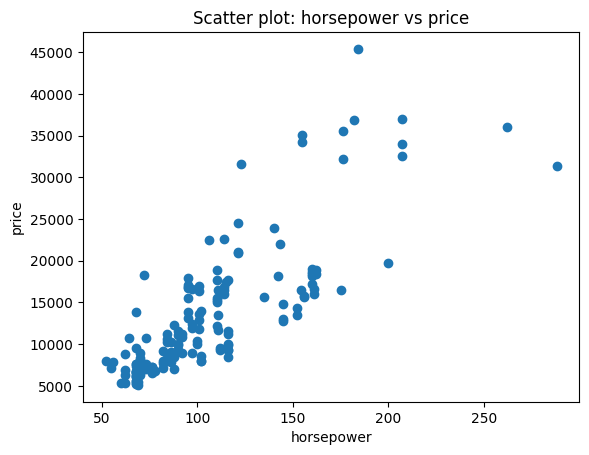

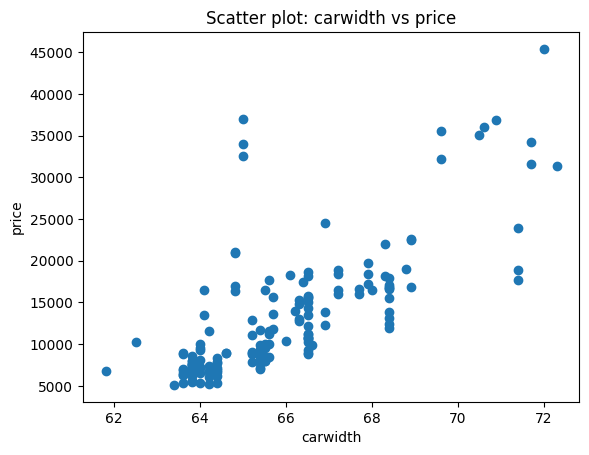

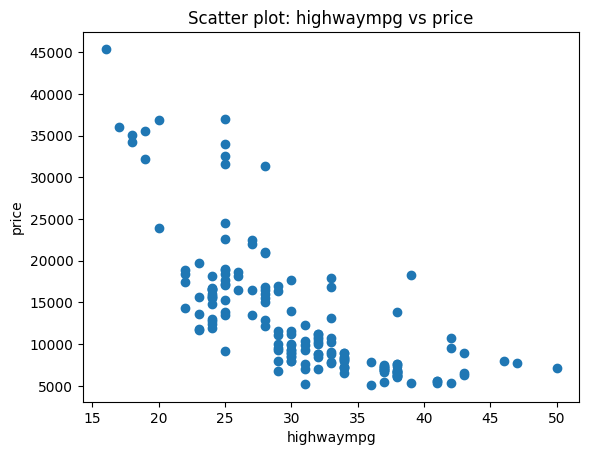

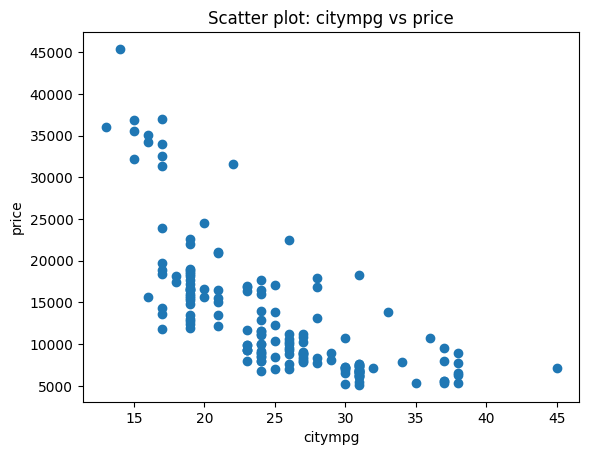

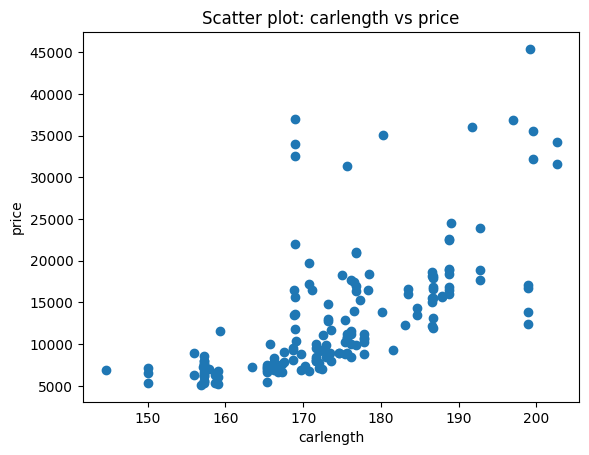

In [ ]:
#Plot the seven numeric columns with the highest correlations with the price column. To do that, use a scatter plot.

top_numeric_cols = correlations[1:8].index
for col in top_numeric_cols:
    plt.scatter(train_data[col], train_data['price'])
    plt.xlabel(col)
    plt.ylabel('price')
    plt.title(f'Scatter plot: {col} vs price')
    plt.show()


In [ ]:
#Create functions for computing the upper and lower fences of a column.
#Upper fence = Q3 + (1.5 * IQR)
#Lower fence = Q1 – (1.5 * IQR).
#For more info, please visit: https://www.statisticshowto.com/upper-and-lower-fences/#:~:text=Upper%20and%20lower%20fences%20cordon,%E2%80%93%20(1.5%20*%20IQR)
def calculate_upper_fence(column):
    q3 = np.percentile(column, 75)
    q1 = np.percentile(column, 25)
    iqr = q3 - q1
    upper_fence = q3 + (1.5 * iqr)
    return upper_fence

def calculate_lower_fence(column):
    q3 = np.percentile(column, 75)
    q1 = np.percentile(column, 25)
    iqr = q3 - q1
    lower_fence = q1 - (1.5 * iqr)
    return lower_fence

def calculate_fences(df):
    fences = {}
    for col in df.columns:
        if df[col].dtype in ['int64', 'float64']:
            upper_fence = calculate_upper_fence(df[col])
            lower_fence = calculate_lower_fence(df[col])
            fences[col] = (lower_fence, upper_fence)
    return fences

    fences = calculate_fences(df)


In [ ]:
#Use the functions for the upper and lower fences to remove outliers for the seven numeric columns that have the highest correlation with the price column.
top_numeric_cols = correlations[1:8].index

# Calculate and store the fences for each numeric column
fences = {}
for col in top_numeric_cols:
    upper_fence = calculate_upper_fence(train_data[col])
    lower_fence = calculate_lower_fence(train_data[col])
    fences[col] = (lower_fence, upper_fence)

# Remove outliers from the dataset
cleaned_data = train_data.copy()
for col in top_numeric_cols:
    lower_fence, upper_fence = fences[col]
    cleaned_data = cleaned_data[(cleaned_data[col] >= lower_fence) & (cleaned_data[col] <= upper_fence)]




In [ ]:
#Step 2: Create and judge a model

#Create a multiple regression model with the seven independent variables that have the highest correlation with the price column.
top_independent_vars = correlations[1:8].index
X = df[top_independent_vars]
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)
score = regression_model.score(X_test, y_test)
print("R-squared score:", score)


R-squared score: 0.8145536079513174


In [ ]:
#Show the model.
top_independent_vars = correlations[1:8].index
X = df[top_independent_vars]
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)
model_summary = pd.DataFrame({'Feature': ['Intercept'] + list(X.columns),
                              'Coefficient': [regression_model.intercept_] + list(regression_model.coef_)})
print(model_summary)

      Feature   Coefficient
0   Intercept -46141.316204
1  enginesize     80.986584
2  curbweight      2.252055
3  horsepower     43.788773
4    carwidth    676.112941
5  highwaympg     59.486882
6     citympg   -123.618244
7   carlength    -25.874350


In [ ]:
#Use the model to add the predicted price and the residuals for the test data set.
top_independent_vars = correlations[1:8].index
X = df[top_independent_vars]
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate the regression model
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)
predicted_prices = regression_model.predict(X_test)
residuals = y_test - predicted_prices
test_data_with_predictions = X_test.copy()
test_data_with_predictions['Predicted_Price'] = predicted_prices
test_data_with_predictions['Residuals'] = residuals
test_data_with_predictions['Actual_Price'] = y_test
test_data_with_predictions.head()

,enginesize,curbweight,horsepower,carwidth,highwaympg,citympg,carlength,Predicted_Price,Residuals,Actual_Price
15,209,3230,182,66.9,22,16,189.0,25701.095634,5058.904366,30760.000
9,131,3053,160,67.9,22,16,178.2,18977.731368,-1118.564368,17859.167
100,120,2302,97,65.2,34,27,173.4,11289.627146,-1740.627146,9549.000
132,121,2658,110,66.5,28,21,186.6,13663.792755,-1813.792755,11850.000
68,183,3750,123,70.3,25,22,190.9,23869.349107,4378.650893,28248.000


In [ ]:
#Show the price, predictions, and residuals columns of the first 6 rows of your updated test data set.
print(test_data_with_predictions[['Actual_Price', 'Predicted_Price', 'Residuals']].head(6))

     Actual_Price  Predicted_Price    Residuals
15      30760.000     25701.095634  5058.904366
9       17859.167     18977.731368 -1118.564368
100      9549.000     11289.627146 -1740.627146
132     11850.000     13663.792755 -1813.792755
68      28248.000     23869.349107  4378.650893
95       7799.000      6523.036622  1275.963378


In [ ]:
#Examine the model by checking its R2 value.
r2_score = regression_model.score(X_test, y_test)

# Print the R2 score
print("R2 score:", r2_score)

R2 score: 0.8145536079513174


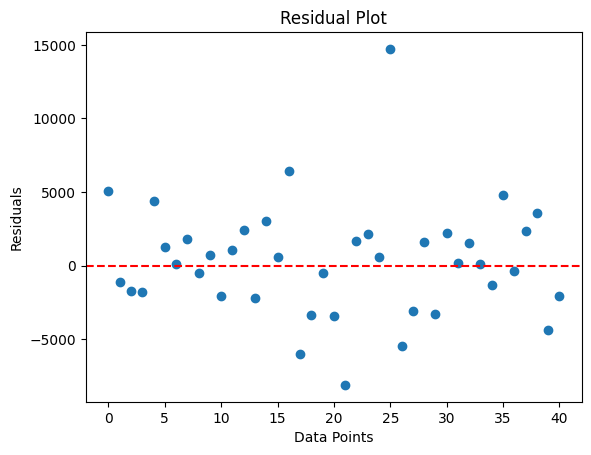

In [ ]:
#Examine the model by plotting its residuals.
residuals = y_test - predicted_prices
plt.scatter(range(len(residuals)), residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Data Points')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

In [ ]:
#Check the model for statistically insignificant variables. Insignificant variables are those with p.value >= 0.05.
X_train = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     101.6
Date:                Thu, 06 Jul 2023   Prob (F-statistic):           8.39e-55
Time:                        10:35:42   Log-Likelihood:                -1560.2
No. Observations:                 164   AIC:                             3136.
Df Residuals:                     156   BIC:                             3161.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -4.614e+04   1.37e+04     -3.359      0.0

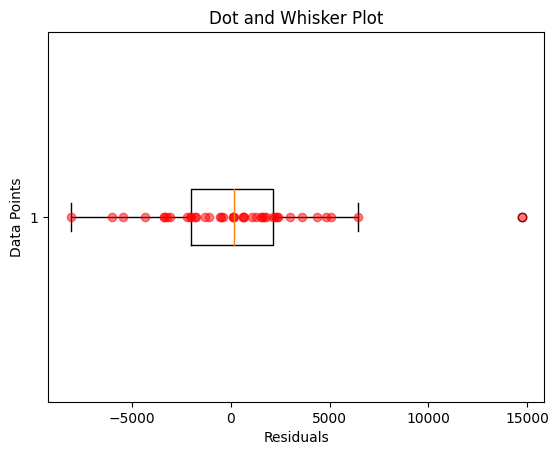

In [ ]:
#Plot the model with a dot and whisker plot. (new skill – dot and whisker plot)
plt.boxplot(residuals, vert=False)

# Overlay scatter plot of the residuals
plt.plot(residuals, [1] * len(residuals), 'ro', alpha=0.5)

plt.xlabel('Residuals')
plt.ylabel('Data Points')
plt.title('Dot and Whisker Plot')
plt.show()

In [ ]:
#Explain what the dot and whisker plot shows

#The dot and whisker plot combines a box plot and scatter plot to display the distribution and individual values of the residuals.

In [ ]:
#Step 3: Create an improved model and Judge It

#reate a second model that doesn't use insignificant variables. Insignificant variables are those with p.value >= 0.05.

X_train_with_constant = sm.add_constant(X_train)

# Fit the multiple regression model using statsmodels
model_with_constant = sm.OLS(y_train, X_train_with_constant)
results_with_constant = model_with_constant.fit()

# Extract the p-values from the results
p_values = results_with_constant.pvalues
significant_vars = p_values[p_values < 0.05].index
X_train_significant = X_train[significant_vars]
model_significant = sm.OLS(y_train, X_train_significant)
results_significant = model_significant.fit()

print(results_significant.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     236.4
Date:                Thu, 06 Jul 2023   Prob (F-statistic):           1.44e-58
Time:                        10:36:43   Log-Likelihood:                -1562.0
No. Observations:                 164   AIC:                             3132.
Df Residuals:                     160   BIC:                             3144.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -6.13e+04   1.08e+04     -5.694      0.0

In [ ]:
#Use the second model to add the predictions and residuals to the test data set.
X_test_with_constant = sm.add_constant(X_test)
X_test_significant = X_test_with_constant[results_significant.params.index]
test_data_with_predictions['Predicted_Price_2'] = results_significant.predict(X_test_significant)
residuals_2 = y_test - test_data_with_predictions['Predicted_Price_2']
test_data_with_predictions['Residuals_2'] = residuals_2
residuals_2.head()

15     5015.370727
9      -579.056594
100   -2044.017766
132   -1689.353836
68     5149.366008
dtype: float64

In [ ]:
#Show the price, predictions, and residuals columns of the first 6 rows of your updated test data set.
print(test_data_with_predictions[['Actual_Price', 'Predicted_Price_2', 'Residuals_2']].head(6))

     Actual_Price  Predicted_Price_2  Residuals_2
15      30760.000       25744.629273  5015.370727
9       17859.167       18438.223594  -579.056594
100      9549.000       11593.017766 -2044.017766
132     11850.000       13539.353836 -1689.353836
68      28248.000       23098.633992  5149.366008
95       7799.000        6762.671021  1036.328979


In [ ]:
#Judge the second model by calculating its R2 value.
r2 = r2_score(y_test, test_data_with_predictions['Predicted_Price_2'])

# Print the R2 value
print("R2 Score:", r2)

R2 Score: 0.8181942873173569


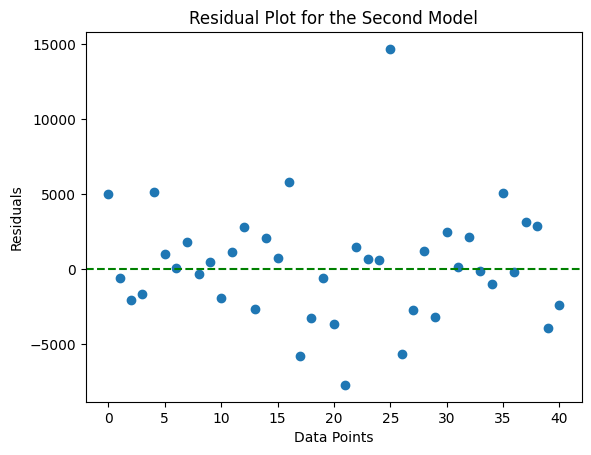

In [ ]:
#Judge the second model by plotting its residuals.
plt.scatter(range(len(residuals_2)), residuals_2)
plt.axhline(0, color='Green', linestyle='--')
plt.xlabel('Data Points')
plt.ylabel('Residuals')
plt.title('Residual Plot for the Second Model')
plt.show()



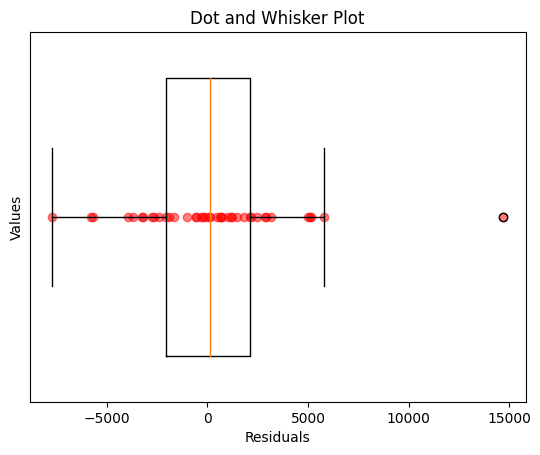

In [ ]:
#Plot the model with a dot and whisker plot.
fig, ax = plt.subplots()

# Plot the box plot of the residuals
ax.boxplot(residuals_2, vert=False)
ax.set_xlabel('Residuals')
ax.set_ylabel('Values')
ax.set_title('Dot and Whisker Plot')
ax.scatter(residuals_2, [1] * len(residuals_2), color='red', alpha=0.5)
ax.set_ylim(0.9, 1.1)
ax.set_yticks([])
ax.set_yticklabels([])
plt.show()

In [ ]:
#Explain what the dot and whisker plot shows

#The code generates a dot and whisker plot that combines a box plot and scatter plot
# to depict the distribution and individual values of the residuals.

In [ ]:
#Explain the findings of your new model. Is it better than the old model?

#the new model's performance compared to the old model requires considering factors such as higher R2 value,
#better residual patterns, significant variables, and improved handling of outliers and influential points.